In [41]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymc3 as pm

In [38]:
N=10*1000+1
j=N/1000
j=int(j)
j*1000

10000

In [42]:
def nonoverlapping_p(posterior, exact):
    N=len(posterior)
    pval=[]
    passed_count=0
    if N>=10000:
        j=int(N/1000)
        posterior=posterior[:j*1000]
        posterior=posterior.reshape(1000,j)
        for i in posterior:
            p=stats.kstest(i,exact)[1]
            pval.append(stats.kstest(i, exact)[1])
            if p>0.01:
                passed_count+=1
    elif N>=1000:
        j=int(N/100)
        posterior=posterior[:j*1000]
        posterior=posterior.reshape(1000,j)
        for i in posterior:
            p=stats.kstest(i,exact)[1]
            pval.append(stats.kstest(i, exact)[1])
            if p>0.01:
                passed_count+=1
    else:
        print ('sample size too small')
    perc_passed=(passed_count/len(pval))*100
    plt.hist(pval, bins=100, density=True, color='b')
    plt.title('p values of samples divided into non overalapping groups')
    text=str(perc_passed)+'%'+' of p values has passed'
    plt.annotate(text, (0.8, 0.9))
    plt.show() 

In [45]:
def overlapping_p(posterior, exact):
    N=len(posterior)
    pval=[]
    passed_count=0
    for i in range(1000):
        partialsample=np.random.choice(posterior, int(N/2))
        p=stats.kstest(partialsample, exact)[1]
        pval.append(p)
        if p>0.01:
            passed_count+=1
        perc_passed=(passed_count/len(pval))*100
    plt.hist(pval, bins=100, density=True, color='g')
    plt.title('distribution of p value with samples divided into overlapping groups')
    text=str(perc_passed)+'%'+' of p values has passed'
    plt.annotate(text, (0.8, 0.9))
    plt.show()  

In [24]:
obs=[1,1,1,0,1,1,0,0,1,1,1,1]
with pm.Model() as model:
    θ=pm.Beta(name='θ', alpha=2,beta=3)
    likelihood=pm.Bernoulli(name='y', p=θ, observed=obs)
    trace1=pm.sample(250000)

posterior1=trace1['θ']

with pm.Model() as model:
    θ=pm.Beta(name='θ', alpha=2,beta=3)
    likelihood=pm.Bernoulli(name='y', p=θ, observed=obs)
    trace2=pm.sample(2500)

posterior2=trace2['θ']

def beta_bernoulli(parameters, obs):
    s=np.sum(obs)
    n=len(obs)
    alpha_new=parameters[0]+s
    beta_new=parameters[1]+n-s
    #stats.beta.rvs(a=alpha_new, b=beta_new, size=factor*N)
    return alpha_new, beta_new

newparam=beta_bernoulli((2,3), obs)

cdf = lambda x: stats.beta.cdf(x, *newparam)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains, 0 divergences: 100%|██████████████████████████████████| 1002000/1002000 [48:51<00:00, 341.76draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains, 0 divergences: 100%|██████████████████████████████████████| 12000/12000 [00:37<00:00, 316.69draws/s]


large sample


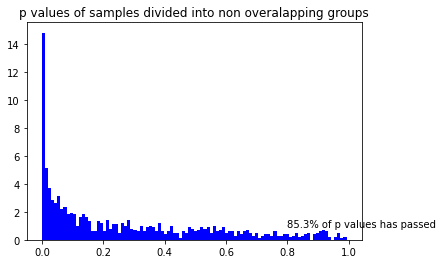

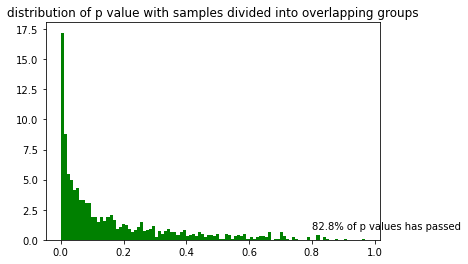

In [46]:
print ('large sample')
nonoverlapping_p(posterior1, cdf)
overlapping_p(posterior1, cdf)

small sample


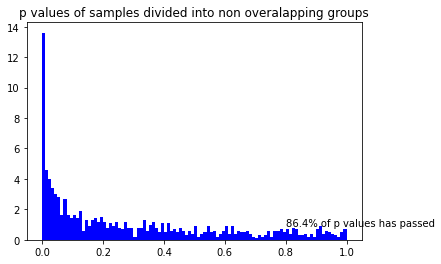

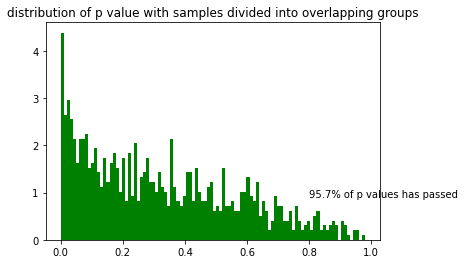

In [47]:
print ('small sample')
nonoverlapping_p(posterior2, cdf)
overlapping_p(posterior2, cdf)

In [15]:
stats.norm.rvs(size=100).reshape(20,5)

array([[ 1.0180419 ,  0.78321289, -0.58958671, -0.13693652, -0.76683965],
       [ 0.16769656,  0.48140094, -0.40352282,  0.82649477,  2.04548183],
       [ 0.51060732, -0.81783209, -0.32562541,  2.05965457, -0.54318992],
       [ 2.78430757,  0.6108613 , -0.85051599, -0.11996562,  0.85193024],
       [-1.48702965,  0.72024712, -1.04219663,  0.55884696, -0.22202694],
       [-1.08296348,  0.60231355, -0.05325143,  1.1232796 , -1.03672069],
       [-0.37261166, -0.41089702, -1.19390588, -0.38360482, -0.53235836],
       [-1.10262774,  1.62716651,  0.10698088, -0.30892704,  0.21027265],
       [-0.89020927, -1.17453616, -0.36345174,  0.15868073, -0.16764872],
       [ 0.66551395,  0.28250825,  0.04775726, -0.55271718,  0.12545924],
       [-0.75947216, -0.319589  , -0.1020213 , -0.15962214,  1.67785989],
       [ 0.08888432,  1.02515126, -0.97052402,  0.51502036,  1.4171352 ],
       [-0.17240619,  0.50666539,  1.57730928,  0.81693598,  1.06601019],
       [ 0.71402543,  1.2443204 , -1.7

In [7]:
stats.norm.rvs(size=10000).shape

(10000,)